In [57]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


df_clean_train_12feature_cross_subject = pd.read_csv("df_clean_train_12feature_cross_subject.csv")
df_clean_test_12feature_cross_subject  = pd.read_csv("df_clean_test_12feature_cross_subject.csv")


# df_clean_train_16feature_cross_subject = pd.read_csv("df_clean_train_16feature_cross_subject.csv")
# df_clean_test_16feature_cross_subject  = pd.read_csv("df_clean_test_16feature_cross_subject.csv")


df_clean_train_16feature_within_subject = pd.read_csv("df_clean_train_16feature_within_subject_txt25.csv")
df_clean_test_16feature_within_subject  = pd.read_csv("df_clean_test_16feature_within_subject_txt25.csv")

df_clean_train = df_clean_train_16feature_within_subject
df_clean_test  = df_clean_test_16feature_within_subject

df_clean_train12 = df_clean_train_12feature_cross_subject
df_clean_test12  = df_clean_test_12feature_cross_subject

In [58]:
from scipy.signal import butter, filtfilt

def low_pass_butter(signal, cutoff=10, fs=100, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)
feature_columns = [
    'MPU1_Acc_X', 'MPU1_Acc_Y', 'MPU1_Acc_Z',
    'MPU1_Gyro_X', 'MPU1_Gyro_Y', 'MPU1_Gyro_Z',
    'MPU1_Roll','MPU1_Pitch',
    'MPU2_Acc_X', 'MPU2_Acc_Y', 'MPU2_Acc_Z',
    'MPU2_Gyro_X', 'MPU2_Gyro_Y', 'MPU2_Gyro_Z',
    'MPU2_Roll','MPU2_Pitch'
]

feature_columns12 = [
    'MPU1_Acc_X', 'MPU1_Acc_Y', 'MPU1_Acc_Z',
    'MPU1_Gyro_X', 'MPU1_Gyro_Y', 'MPU1_Gyro_Z',
    
    'MPU2_Acc_X', 'MPU2_Acc_Y', 'MPU2_Acc_Z',
    'MPU2_Gyro_X', 'MPU2_Gyro_Y', 'MPU2_Gyro_Z',
    
]


df_filtered_trainig = pd.DataFrame()
df_filtered_test    = pd.DataFrame()
for col in feature_columns:
    df_filtered_trainig[col] = low_pass_butter( df_clean_train[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )
    df_filtered_test[col] = low_pass_butter( df_clean_test[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )
    

df_filtered_trainig12 = pd.DataFrame()
df_filtered_test12    = pd.DataFrame()
for col in feature_columns12:
    df_filtered_trainig12[col] = low_pass_butter( df_clean_train12[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )
    df_filtered_test12[col] = low_pass_butter( df_clean_test12[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )


In [59]:

from sklearn.preprocessing import  MinMaxScaler


scaler = MinMaxScaler(feature_range=(-1, 1))
X_data_train = scaler.fit_transform(df_filtered_trainig[feature_columns].values) 


y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_data_train = y_scaler.fit_transform(df_clean_train['angle'].values.reshape(-1, 1))


X_data_test = scaler.transform(df_filtered_test[feature_columns].values)

y_data_test = y_scaler.transform(df_clean_test["angle"].values.reshape(-1,1))
####################################################################



scaler12 = MinMaxScaler(feature_range=(-1, 1))
X_data_train12 = scaler12.fit_transform(df_filtered_trainig12[feature_columns12].values)  

y_scaler12 = MinMaxScaler(feature_range=(-1, 1))
y_data_train12 = y_scaler12.fit_transform(df_clean_train12['angle'].values.reshape(-1, 1))


X_data_test12 = scaler12.transform(df_filtered_test12[feature_columns12].values)

y_data_test12 = y_scaler12.transform(df_clean_test12["angle"].values.reshape(-1,1))



####################################################################



# تابع پنجره‌بندی
def create_windows_with_labels(X, y, window_size, horizon, step_size):
    X_windows = []
    y_windows = []
    for i in range(0,  len(X) - window_size - horizon + 1, step_size):
        X_windows.append(X[i:i + window_size])
        y_windows.append(y[i + window_size : i + window_size + horizon])  # برچسب آخرین نمونه در پنجره
    return np.array(X_windows), np.array(y_windows)

In [60]:
# تنظیمات پنجره
window_size = 200   # 
horizon = 50
step_size = 5      # 

# ایجاد پنجره‌ها
X_windows, y_windows = create_windows_with_labels(X_data_train, y_data_train,
                                                  window_size, horizon, step_size)
if horizon==1:
    y_windows = y_windows.reshape(-1,1)
else:
    y_windows = np.squeeze(y_windows, axis=2)


######################################
X_windows12, y_windows12 = create_windows_with_labels(X_data_train12, y_data_train12,
                                                  window_size, horizon, step_size)
if horizon==1:
    y_windows12 = y_windows12.reshape(-1,1)
else:
    y_windows12 = np.squeeze(y_windows12, axis=2)




###############################################################################################################################################################
step_size_for_test = 1
X_windows_test, y_windows_test = create_windows_with_labels(X_data_test, y_data_test,
                                                            window_size, horizon, step_size_for_test)

if horizon==1:
    y_windows_test = y_windows_test.reshape(-1,1)
else:
    y_windows_test = np.squeeze(y_windows_test, axis=2)



#########################################
X_windows_test12, y_windows_test12 = create_windows_with_labels(X_data_test12, y_data_test12,
                                                            window_size, horizon, step_size_for_test)

if horizon==1:
    y_windows_test12 = y_windows_test12.reshape(-1,1)
else:
    y_windows_test12 = np.squeeze(y_windows_test12, axis=2)

print(f"✅   (X_windows):(samples, time steps, features) → {X_windows.shape}")
print(f"✅  (y_windows): {y_windows.shape}")
print(f"\n✅   (X_windows_test):(samples, time steps, features) → {X_windows_test.shape}")
print(f"✅  (y_windows_test): {y_windows_test.shape}")


print(f"\n\n✅   (X_windows):(samples, time steps, features) → {X_windows12.shape}")
print(f"✅  (y_windows): {y_windows12.shape}")
print(f"\n✅   (X_windows_test):(samples, time steps, features) → {X_windows_test12.shape}")
print(f"✅  (y_windows_test): {y_windows_test12.shape}")



✅   (X_windows):(samples, time steps, features) → (3251, 200, 16)
✅  (y_windows): (3251, 50)

✅   (X_windows_test):(samples, time steps, features) → (743, 200, 16)
✅  (y_windows_test): (743, 50)


✅   (X_windows):(samples, time steps, features) → (17429, 200, 12)
✅  (y_windows): (17429, 50)

✅   (X_windows_test):(samples, time steps, features) → (17243, 200, 12)
✅  (y_windows_test): (17243, 50)


In [ ]:
# # تنظیمات پنجره
# window_size = 200   # 
# horizon20 = 20        #
# horizon50 = 50
# step_size = 5      # 

# # ایجاد پنجره‌ها
# X_windows20, y_windows20 = create_windows_with_labels(X_data_train, y_data_train,
#                                                   window_size, horizon20, step_size)
# if horizon20==1:
#     y_windows20 = y_windows20.reshape(-1,1)
# else:
#     y_windows20 = np.squeeze(y_windows20, axis=2)


# ######################################
# X_windows50, y_windows50 = create_windows_with_labels(X_data_train, y_data_train,
#                                                   window_size, horizon50, step_size)
# if horizon50==1:
#     y_windows50 = y_windows50.reshape(-1,1)
# else:
#     y_windows50 = np.squeeze(y_windows50, axis=2)



# # print(f"✅   (X_windows):(samples, time steps, features) → {X_windows.shape}")
# # print(f"✅  (y_windows): {y_windows.shape}")

# step_size_for_test = 1
# X_windows_test20, y_windows_test20 = create_windows_with_labels(X_data_test, y_data_test,
#                                                             window_size, horizon20, step_size_for_test)

# if horizon20==1:
#     y_windows_test20 = y_windows_test20.reshape(-1,1)
# else:
#     y_windows_test20 = np.squeeze(y_windows_test20, axis=2)



# #########################################
# X_windows_test50, y_windows_test50 = create_windows_with_labels(X_data_test, y_data_test,
#                                                             window_size, horizon50, step_size_for_test)

# if horizon50==1:
#     y_windows_test50 = y_windows_test50.reshape(-1,1)
# else:
#     y_windows_test50 = np.squeeze(y_windows_test50, axis=2)


# # print(f"\n✅   (X_windows_test):(samples, time steps, features) → {X_windows_test.shape}")
# # print(f"✅  (y_windows_test): {y_windows_test.shape}")






In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


# df_clean_train_12feature_cross_subject = pd.read_csv("/kaggle/working/crispy-computing-machine/df_clean_train_12feature_cross_subject.csv")
# df_clean_test_12feature_cross_subject  = pd.read_csv("/kaggle/working/crispy-computing-machine/df_clean_test_12feature_cross_subject.csv")


df_clean_train_16feature_cross_subject = pd.read_csv("df_clean_train_16feature_cross_subject.csv")
df_clean_test_16feature_cross_subject  = pd.read_csv("df_clean_test_16feature_cross_subject.csv")


# df_clean_train_16feature_within_subject = pd.read_csv("/kaggle/working/crispy-computing-machine/df_clean_train_16feature_within_subject_txt25.csv")
# df_clean_test_16feature_within_subject  = pd.read_csv("/kaggle/working/crispy-computing-machine/df_clean_test_16feature_within_subject_txt25.csv")

df_clean_train = df_clean_train_16feature_cross_subject
df_clean_test  = df_clean_test_16feature_cross_subject

In [ ]:
from scipy.signal import butter, filtfilt

def low_pass_butter(signal, cutoff=10, fs=100, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)
feature_columns = [
    'MPU1_Acc_X', 'MPU1_Acc_Y', 'MPU1_Acc_Z',
    'MPU1_Gyro_X', 'MPU1_Gyro_Y', 'MPU1_Gyro_Z',
    'MPU1_Roll','MPU1_Pitch',
    'MPU2_Acc_X', 'MPU2_Acc_Y', 'MPU2_Acc_Z',
    'MPU2_Gyro_X', 'MPU2_Gyro_Y', 'MPU2_Gyro_Z',
    'MPU2_Roll','MPU2_Pitch'
]

# feature_columns = [
#     'MPU1_Acc_X', 'MPU1_Acc_Y', 'MPU1_Acc_Z',
#     'MPU1_Gyro_X', 'MPU1_Gyro_Y', 'MPU1_Gyro_Z',
    
#     'MPU2_Acc_X', 'MPU2_Acc_Y', 'MPU2_Acc_Z',
#     'MPU2_Gyro_X', 'MPU2_Gyro_Y', 'MPU2_Gyro_Z',
    
# ]


df_filtered_trainig = pd.DataFrame()
df_filtered_test    = pd.DataFrame()
for col in feature_columns:
    df_filtered_trainig[col] = low_pass_butter( df_clean_train[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )
    df_filtered_test[col] = low_pass_butter( df_clean_test[col].values
                                        , cutoff=5 # Hz
                                        , fs=100  # Hz
                                        , order=2  )



# # اعمال حد مجاز [-200, 200] روی تمام ژیروسکوپ‌ها
# for col in ['MPU1_Gyro_X', 'MPU1_Gyro_Y', 'MPU1_Gyro_Z','MPU2_Gyro_X', 'MPU2_Gyro_Y', 'MPU2_Gyro_Z']:
#     df_filtered_trainig[col] = np.clip(df_filtered_trainig[col], -250, 250)
#     df_filtered_test[col]    = np.clip(df_filtered_test[col], -250, 250)


# # اعمال حد مجاز [-10, 10] روی تمام ژیروسکوپ‌ها
# for col in ['MPU1_Acc_X', 'MPU1_Acc_Y', 'MPU1_Acc_Z', 'MPU2_Acc_X', 'MPU2_Acc_Y', 'MPU2_Acc_Z']:
#     df_filtered_trainig[col] = np.clip(df_filtered_trainig[col], -10, 10)
#     df_filtered_test[col]    = np.clip(df_filtered_test[col], -10, 10)



print("\ndf_filtered_trainig shape:",df_filtered_trainig.shape)
print("\ndf_filtered_test shape:",df_filtered_test.shape)



from sklearn.preprocessing import  MinMaxScaler







scaler = MinMaxScaler(feature_range=(-1, 1))
X_data_train = scaler.fit_transform(df_filtered_trainig[feature_columns].values)  # (T, 12)


y_scaler = MinMaxScaler(feature_range=(-1, 1))
y_data_train = y_scaler.fit_transform(df_clean_train['angle'].values.reshape(-1, 1))





X_data_test = scaler.transform(df_filtered_test[feature_columns].values)

y_data_test = y_scaler.transform(df_clean_test["angle"].values.reshape(-1,1))


# تنظیمات پنجره
window_size = 200   # 
horizon = 1        #
step_size = 5      # 

# تابع پنجره‌بندی
def create_windows_with_labels(X, y, window_size, horizon, step_size):
    X_windows = []
    y_windows = []
    for i in range(0,  len(X) - window_size - horizon + 1, step_size):
        X_windows.append(X[i:i + window_size])
        y_windows.append(y[i + window_size : i + window_size + horizon])  # برچسب آخرین نمونه در پنجره
    return np.array(X_windows), np.array(y_windows)

# ایجاد پنجره‌ها
X_windows_16, y_windows_16 = create_windows_with_labels(X_data_train, y_data_train,
                                                  window_size, horizon, step_size)
if horizon==1:
    y_windows_16 = y_windows_16.reshape(-1,1)




print(f"✅   (X_windows_16):(samples, time steps, features) → {X_windows_16.shape}")
print(f"✅  (y_windows_16): {y_windows_16.shape}")

step_size_for_test = 1
X_windows_test_16, y_windows_test_16 = create_windows_with_labels(X_data_test, y_data_test,
                                                            window_size, horizon, step_size_for_test)

if horizon==1:
    y_windows_test_16 = y_windows_test_16.reshape(-1,1)

print(f"\n✅   (X_windows_test_16):(samples, time steps, features) → {X_windows_test_16.shape}")
print(f"✅  (y_windows_test_16): {y_windows_test_16.shape}")







In [ ]:
y_pred_scaled16 = model.predict(X_windows_test_16)  # (N, 1)

In [ ]:
# برگرداندن به مقیاس اصلی
y_pred_original16 = y_scaler.inverse_transform(y_pred_scaled16)
y_true_original16 = y_scaler.inverse_transform(y_windows_test_16)  




mae = mean_absolute_error(y_true_original16, y_pred_original16)
mae2 = mean_absolute_error(y_windows_test_16, y_pred_scaled16)

print(f"Test MAE(scaled): {mae2:.3f}")
print(f"Test MAE(true value): {mae:.3f}")

## رسم نمودار multi step prediction

In [ ]:
import matplotlib.pyplot as plt

# Define segment range
n1, n2 = 9705, 9895

# Create figure and subplots
# plt.figure(figsize=(10, 8))



time = np.arange(1, y_true_original16.shape[0]+1) * 0.01
time = time.reshape(-1, 1) 






plt.plot(time[n1:n2-1] , y_true_original16[n1:n2-1,0], linewidth=2, color='#1f77b4')


plt.plot(time[n2-20:n2] ,  y_true_original16[n2-20:n2,0], label='Ground Truth', linewidth=2, color="#1fb453")
plt.plot(time[n2-20:n2] ,  y_pred_original16[n2-20:n2,0], label='1-step horizon Predicted', linewidth=2, linestyle='--', color="#691fb4")

plt.plot(time[n2-20:n2-0] , y_pred_20h[n2-20,:], label='20-step horizon Predicted', linestyle='--', linewidth=2, color='#ff7f0e')


plt.title('Bi-LSTM Prediction of Ankle Joint Angles (Cross-Subject)', fontsize=12)
plt.ylabel('Ankle Angle (°)', fontsize=11)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.legend(fontsize=10, loc='upper right')


plt.xlabel('time (second)', fontsize=11)


# Adjust layout
plt.tight_layout()
plt.savefig('cross_subject.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pickle



import pickle

# Load the history dictionary from the file
with open('C:\\Users\\Hp\\Desktop\\models\\final_models\\m4m2_lstm_16eatue_cross_subject_20stephorizon\\training_history.pkl', 'rb') as f:
    history_dict = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Set font sizes and styles for publication
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'serif',  # Optional: use serif font (common in papers)
    'figure.figsize': (8, 5)
})

# Plot training & validation loss
plt.plot(history_dict["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
plt.plot(history_dict["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')

# Add title and axis labels
# plt.title("Model Training Progress", fontsize=18, pad=20)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")

# Improve layout and add grid
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend(frameon=True, loc='upper right', shadow=False, edgecolor='black')

# Use tight layout to prevent clipping
plt.tight_layout()

# Save high-resolution figure for your article
plt.savefig("loss_cross_subject.png", dpi=300, bbox_inches='tight')
# plt.savefig("training_validation_loss.png", format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- تنظیمات اولیه ---
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.linewidth': 1.5,
    'axes.labelsize': 14,
    'xtick.labelsize': 20,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': (18, 20),  # اندازه کل شکل
})

# --- داده‌های فرضی (شما باید این را با داده‌های واقعی خود جایگزین کنید) ---
# هر عنصر شامل: [LSTM, CNN, IMU-IK] برای UI, UG, UA


#  'Cross-subject', 'within-subject', 'Transfer Learning'
mae = np.array([
    [2.38, 0.8, 0.8 ],   # 20-step-ahead horizon
    [3.57, 1.15, 1.08]     # 50-step-ahead horizon
])

rmse = np.array([
    [2.86, 1, 1.02 ],   # 20-step-ahead horizon
    [4.21, 1.55, 1.4]     # 50-step-ahead horizon

])



# برچسب‌ها
methods = ['20-step-ahead horizon', '50-step-ahead horizon']
x_labels = ['Cross-subject', 'within-subject', 'Transfer Learning']


x_labels = ['20-step-ahead horizon', '50-step-ahead horizon']
methods = ['Cross-subject', 'whithin-subject', 'Transfer Learning']
x = np.arange(len(x_labels))  # موقعیت x برای هر گروه
width = 0.2  # عرض هر ستون

# --- رسم نمودار ---
fig, axes = plt.subplots(1, 2, figsize=(19, 9))
# Add main figure title
fig.suptitle('Comparison of MAE and RMSE Across Prediction Horizons', fontsize=22, fontweight='bold')

# زیرنمودار a: RMSE
ax1 = axes[0]
bars1 = ax1.bar(x - width, mae[:, 0], width, label=methods[0], color='#4c91c3', edgecolor='black', hatch='/')
bars2 = ax1.bar(x, mae[:, 1], width, label=methods[1], color='#bc5050', edgecolor='black', hatch='\\')
bars3 = ax1.bar(x + width, mae[:, 2], width, label=methods[2], color="#65ce65", edgecolor='black', hatch='x')

ax1.set_title('a)', fontsize=16, fontweight='bold', loc='left')
ax1.set_ylabel('MAE(°)', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True)

# زیرنمودار b: NRMSE
ax2 = axes[1]
bars1 = ax2.bar(x - width, rmse[:, 0], width, label=methods[0], color="#4c91c3", edgecolor='black', hatch='/')
bars2 = ax2.bar(x, rmse[:, 1], width, label=methods[1], color="#bc5050", edgecolor='black', hatch='\\')
bars3 = ax2.bar(x + width, rmse[:, 2], width, label=methods[2], color="#65ce65", edgecolor='black', hatch='x')

ax2.set_title('b)', fontsize=16, fontweight='bold', loc='left')
ax2.set_ylabel('RMSE(°)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', frameon=True)


# تنظیمات نهایی
plt.tight_layout()
plt.show()

# اگر می‌خواهید نمودار را ذخیره کنید:
fig.savefig('comparison_bar_chart.png', dpi=300, bbox_inches='tight')

# bib

In [61]:
from tensorflow.keras.models import load_model

mode_1 = load_model("C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\2_within_subject_h50\\best_lstm_model_reg.keras")
mode_2 = load_model("C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\7_12features_cross_subject_h50\\best_lstm_model_reg.keras")

In [62]:

from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import root_mean_squared_error

# پیش‌بینی روی داده تست-
y_pred_scaled = mode_1.predict(X_windows_test)  # (N, 1)

# برگرداندن به مقیاس اصلی
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
y_true_original = y_scaler.inverse_transform(y_windows_test)




mae = mean_absolute_error(y_true_original, y_pred_original)
mae2 = mean_absolute_error(y_windows_test, y_pred_scaled)


print(f"Test MAE(scaled): {mae2:.3f}")

print(f"Test MAE(true value): {mae:.3f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step
Test MAE(scaled): 0.080
Test MAE(true value): 1.154


In [10]:
rmse = root_mean_squared_error(y_true_original, y_pred_original)
rmse

4.214813507488957

In [11]:

from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import root_mean_squared_error

# پیش‌بینی روی داده تست-
y_pred_scaled2 = mode_2.predict(X_windows_test12)  # (N, 1)

# برگرداندن به مقیاس اصلی
y_pred_original2 = y_scaler.inverse_transform(y_pred_scaled2)
y_true_original2 = y_scaler.inverse_transform(y_windows_test12)




mae = mean_absolute_error(y_true_original2, y_pred_original2)
mae2 = mean_absolute_error(y_windows_test12, y_pred_scaled2)


print(f"Test MAE(scaled): {mae2:.3f}")

print(f"Test MAE(true value): {mae:.3f}")

539/539 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step
Test MAE(scaled): 0.212
Test MAE(true value): 4.414


In [12]:
rmse = root_mean_squared_error(y_true_original2, y_pred_original2)
rmse

5.14397379112988

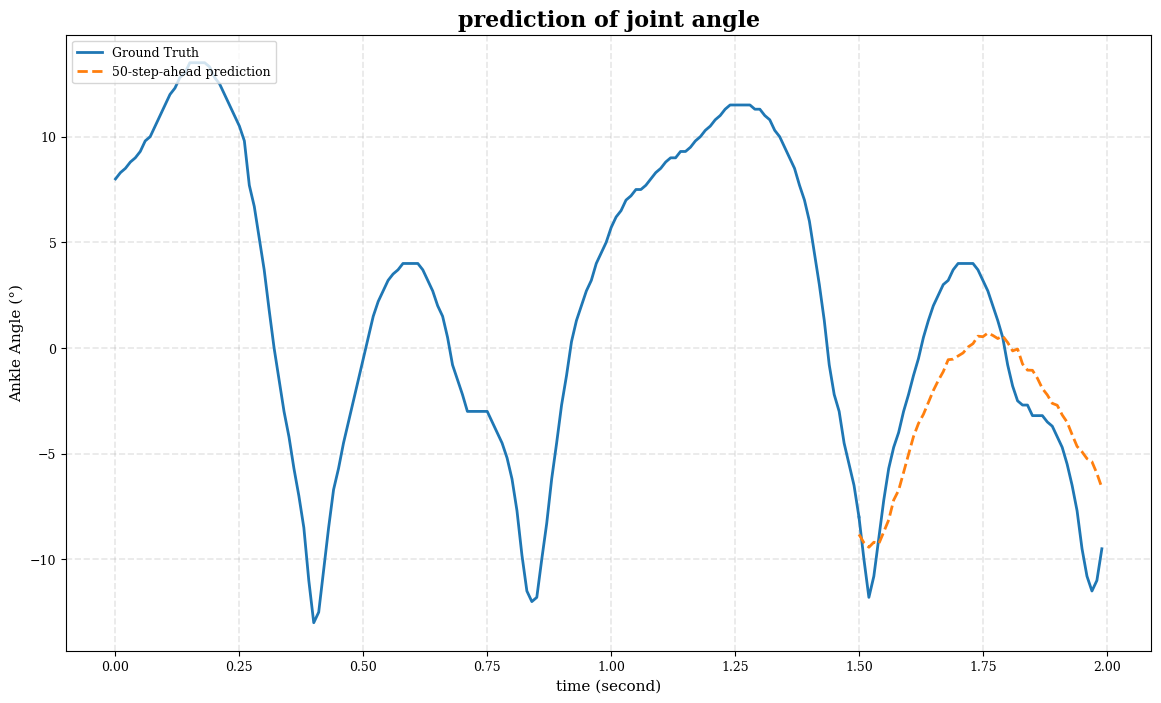

In [56]:
import matplotlib.pyplot as plt

# # Define segment range
# n1, n2 = 0, 292

# # Create figure and subplots
# plt.figure(figsize=(10, 8))

# # --- Subplot 1 ---
# plt.subplot(1, 1, 1)


# time = np.arange(1, y_true_original.shape[0]+1) * 0.01
# time = time.reshape(-1, 1)

# # plt.plot(time[n1:n2] , y_true_original[n1:n2], label='Ground Truth', linewidth=2, color='#1f77b4')
# # plt.plot(time[n1:n2] , y_pred_original[n1:n2], label='Predicted', linestyle='--', linewidth=2, color='#ff7f0e')
# difference = 150
# n1 = 0
# t = np.arange(n1, n1+difference+1) * 0.01
# nn1 = 1600     ## 165 , 170 , 175 , 1478


# axes.plot(t,y_true_original[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
# t2 = np.arange(n1+difference, n1+difference+50) * 0.01
# axes.plot(t2 ,y_true_original[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
# axes.plot(t2 ,y_pred_original[nn1+difference,:],label="50-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')


# plt.title('a) Bi-LSTM Model - one-step-ahead predicted ankle joint angles (transfer learning)', fontsize=12)
# plt.xlabel('time (second)', fontsize=11)

# plt.ylabel('Ankle Angle (°)', fontsize=11)
# plt.grid(True, linestyle=':', linewidth=0.7)
# plt.legend(fontsize=10, loc='upper right')

# # # # --- Subplot 2 ---
# # plt.subplot(2, 1, 2)
# # # plt.plot(time[n1:n2] , y_true_original12[n1:n2], label='Ground Truth', linewidth=2, color='#1f77b4')
# # # plt.plot(time[n1:n2] , y_pred_original12[n1:n2], label='Predicted', linestyle='--', linewidth=2, color="#ff7f0e")
# # # plt.title('(b) Bi-LSTM Model - 12 Features', fontsize=12)

# # plt.plot(history.history["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
# # plt.plot(history.history["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')
# # plt.xlabel("Epoch")
# # plt.ylabel("Loss (MSE)")
# # plt.grid(True, linestyle=':', linewidth=0.7)
# # plt.legend(fontsize=10, loc='upper right')
# # plt.title('b) trainig and validation Loss', fontsize=12)


# # Add title and axis labels
# # plt.title("Model Training Progress", fontsize=18, pad=20)
# plt.xlabel("Epoch", fontsize=11)
# plt.ylabel("Loss (MSE)", fontsize=11)
# # Adjust layout
# plt.tight_layout()
# plt.savefig('transfer_learning.png', dpi=300, bbox_inches='tight')
# plt.show()



import matplotlib.pyplot as plt
import numpy as np
import pickle

# Set global font settings for scientific publishing
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.titleweight': 'bold',
    'lines.linewidth': 1.2,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'savefig.dpi': 300,
    'savefig.format': 'pdf',  # Recommended for articles
    'text.usetex': False  # Set to True if you have LaTeX installed
})



# Create the 2x2 subplot figure
# fig, axes = plt.subplots(1, 1, figsize=(14, 8))
plt.figure(figsize=(14,8))

difference = 150
n1 = 0
t = np.arange(n1, n1+difference+1) * 0.01
nn1 = 1600     ## 165 , 170 , 175 , 1478


plt.plot(t,y_true_original[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
t2 = np.arange(n1+difference, n1+difference+50) * 0.01
plt.plot(t2 ,y_true_original[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
plt.plot(t2 ,y_pred_original[nn1+difference,:],label="50-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')
plt.grid(True,  linewidth=1.2)
plt.xlabel('time (second)', fontsize=11)
plt.ylabel('Ankle Angle (°)', fontsize=11)
plt.legend(loc = "upper left")
plt.title('prediction of joint angle',fontsize=16)
plt.savefig('xxx.png', bbox_inches='tight')


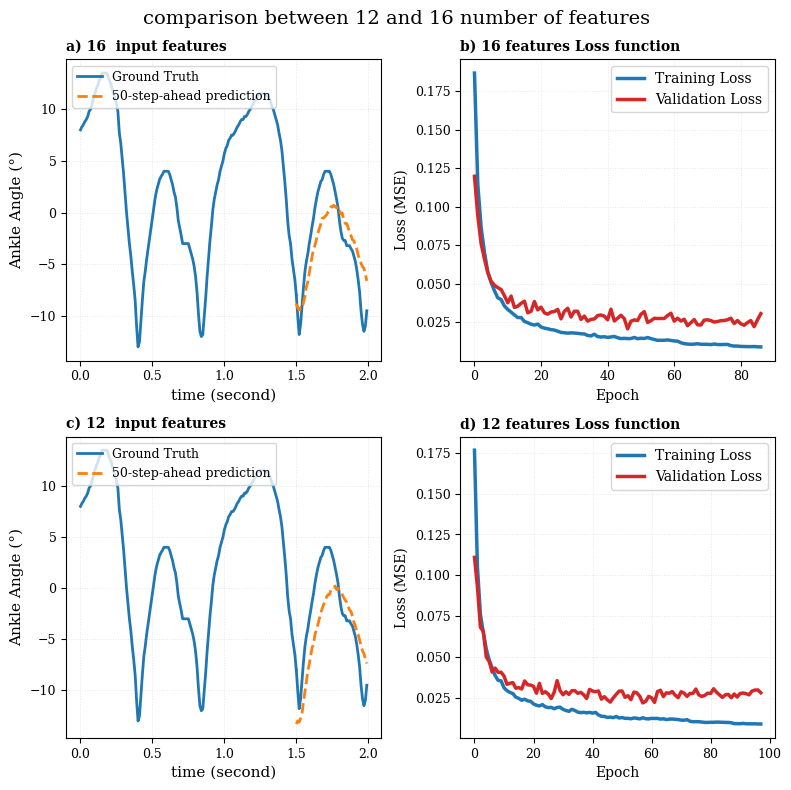

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Set global font settings for scientific publishing
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.titleweight': 'bold',
    'lines.linewidth': 1.2,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'savefig.dpi': 300,
    'savefig.format': 'pdf',  # Recommended for articles
    'text.usetex': False  # Set to True if you have LaTeX installed
})



# Create the 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


difference = 150
n1 = 0
t = np.arange(n1, n1+difference+1) * 0.01
nn1 = 1600     ## 165 , 170 , 175 , 1478


axes[0, 0].plot(t,y_true_original[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
t2 = np.arange(n1+difference, n1+difference+50) * 0.01
axes[0, 0].plot(t2 ,y_true_original[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
axes[0, 0].plot(t2 ,y_pred_original[nn1+difference,:],label="50-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')
axes[0, 0].grid(True, linestyle=':', linewidth=0.7)
axes[0, 0].set_xlabel('time (second)', fontsize=11)
axes[0, 0].set_ylabel('Ankle Angle (°)', fontsize=11)
axes[0, 0].legend(loc = "upper left")
axes[0, 0].set_title('a) 16  input features ', loc='left', fontweight='bold')

##########################################################################################
# Open the file in binary read mode and load the object
with open('C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\4_cross_subject_h50\\training_history.pkl', 'rb') as file:
    history = pickle.load(file)


axes[0, 1].plot(history["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
axes[0, 1].plot(history["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Loss (MSE)")
axes[0, 1].grid(True, linestyle=':', linewidth=0.7)
axes[0, 1].legend(fontsize=10, loc='upper right')
axes[0, 1].set_title('b) 16 features Loss function', loc='left', fontweight='bold')
##########################################################################################

axes[1, 0].plot(t,y_true_original2[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
t2 = np.arange(n1+difference, n1+difference+50) * 0.01
axes[1, 0].plot(t2 ,y_true_original2[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
axes[1, 0].plot(t2 ,y_pred_original2[nn1+difference,:],label="50-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')
axes[1, 0].grid(True, linestyle=':', linewidth=0.7)
axes[1, 0].set_xlabel('time (second)', fontsize=11)
axes[1, 0].set_ylabel('Ankle Angle (°)', fontsize=11)
axes[1, 0].legend(loc = "upper left")
axes[1, 0].set_title('c) 12  input features ', loc='left', fontweight='bold')



##########################################################################################
with open('C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\7_12features_cross_subject_h50\\training_history.pkl', 'rb') as file:
    history = pickle.load(file)


axes[1, 1].plot(history["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
axes[1, 1].plot(history["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss (MSE)")
axes[1, 1].grid(True, linestyle=':', linewidth=0.7)
axes[1, 1].legend(fontsize=10, loc='upper right')
axes[1, 1].set_title('d) 12 features Loss function', loc='left', fontweight='bold')



fig.suptitle('comparison between 12 and 16 number of features', fontsize=14, y=0.98)
plt.tight_layout(pad=1.0)
plt.savefig('12_16_features.pdf', bbox_inches='tight')
plt.show()

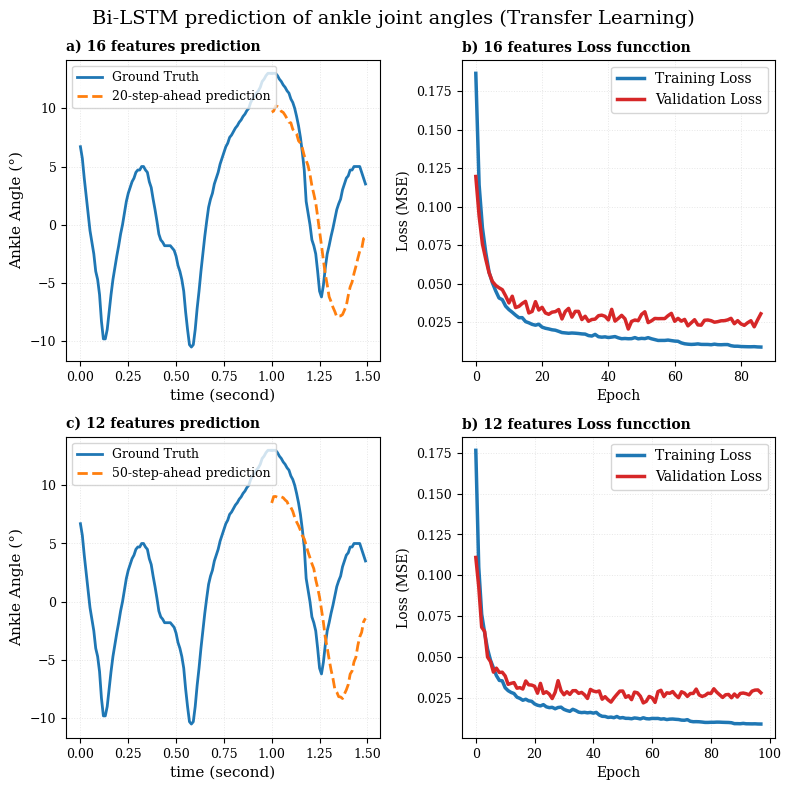

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Set global font settings for scientific publishing
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'axes.titleweight': 'bold',
    'lines.linewidth': 1.2,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'savefig.dpi': 300,
    'savefig.format': 'pdf',  # Recommended for articles
    'text.usetex': False  # Set to True if you have LaTeX installed
})


# Create the 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


difference = 150
n1 = 0
t = np.arange(n1, n1+difference+1) * 0.01
nn1 = 165


axes[0, 0].plot(t,y_true_original20[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
t2 = np.arange(n1+difference, n1+difference+20) * 0.01
axes[0, 0].plot(t2 ,y_true_original20[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
axes[0, 0].plot(t2 ,y_pred_original20[nn1+difference,:],label="20-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')
axes[0, 0].grid(True, linestyle=':', linewidth=0.7)
axes[0, 0].set_xlabel('time (second)', fontsize=11)
axes[0, 0].set_ylabel('Ankle Angle (°)', fontsize=11)
axes[0, 0].legend(loc = "upper left")
axes[0, 0].set_title('a) 20 step horizon angle prediction', loc='left', fontweight='bold')

##########################################################################################
# Open the file in binary read mode and load the object
with open('C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\5_TL_h20\\training_history.pkl', 'rb') as file:
    history = pickle.load(file)


axes[0, 1].plot(history["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
axes[0, 1].plot(history["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Loss (MSE)")
axes[0, 1].grid(True, linestyle=':', linewidth=0.7)
axes[0, 1].legend(fontsize=10, loc='upper right')
axes[0, 1].set_title('b) 20 step horizon Loss', loc='left', fontweight='bold')
##########################################################################################

axes[1, 0].plot(t,y_true_original50[nn1:nn1+difference+1,0], linewidth=2, color='#1f77b4')
t2 = np.arange(n1+difference, n1+difference+50) * 0.01
axes[1, 0].plot(t2 ,y_true_original50[nn1+difference,:],label="Ground Truth", linewidth=2, color='#1f77b4')
axes[1, 0].plot(t2 ,y_pred_original50[nn1+difference,:],label="50-step-ahead prediction", linestyle='--', linewidth=2, color='#ff7f0e')
axes[1, 0].grid(True, linestyle=':', linewidth=0.7)
axes[1, 0].set_xlabel('time (second)', fontsize=11)
axes[1, 0].set_ylabel('Ankle Angle (°)', fontsize=11)
axes[1, 0].legend(loc = "upper left")
axes[1, 0].set_title('c) 50 step horizon angle prediction', loc='left', fontweight='bold')



##########################################################################################
with open('C:\\Users\\Hp\\Desktop\\models\\final_models_for_publication\\6_TL_h50\\training_history.pkl', 'rb') as file:
    history = pickle.load(file)


axes[1, 1].plot(history["loss"], label="Training Loss", linewidth=2.5, color='tab:blue')
axes[1, 1].plot(history["val_loss"], label="Validation Loss", linewidth=2.5, color='tab:red')
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss (MSE)")
axes[1, 1].grid(True, linestyle=':', linewidth=0.7)
axes[1, 1].legend(fontsize=10, loc='upper right')
axes[1, 1].set_title('d) 50 step horizon Loss', loc='left', fontweight='bold')



fig.suptitle('Bi-LSTM prediction of ankle joint angles (Transfer Learning) ', fontsize=14, y=0.98)
plt.tight_layout(pad=1.0)
plt.savefig('transfer_learning.pdf', bbox_inches='tight')
plt.show()